<a href="https://colab.research.google.com/github/sheki018/mini-project/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INSTALL AND IMPORT MODULES**

In [ ]:
!pip uninstall crypto
!pip uninstall pycryptodome
!pip install pycryptodome


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 8.0 MB/s 


In [ ]:
!pip install cryptography

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 7.3 MB/s 


In [ ]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes

In [ ]:
!pip install stepic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 219 kB 8.7 MB/s 
  Created wheel for stepic: filename=stepic-0.5.0-py3-none-any.whl size=12428 sha256=f6fe377e94194005e1667c290e59c55488763ade592eb73aaa69f02e7c4455f2
  Stored in directory: /root/.cache/pip/wheels/47/8d/57/322e721ace59cf72d328242bbc636e6affc672344cf5480f33
Successfully built stepic


## **KEY GENERATION**

In [ ]:
def gen_key():
    private_key = rsa.generate_private_key(
        public_exponent=65537, key_size=2048, backend=default_backend())
    
    public_key = private_key.public_key()
    return private_key, public_key


def save_pvkey(pk, filename):
    pem = pk.private_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PrivateFormat.TraditionalOpenSSL,
        encryption_algorithm=serialization.NoEncryption()
    )
    with open(filename, 'wb') as pem_out:
        pem_out.write(pem)
        
def save_pukey(pk, filename):        
    pem = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
    )
    with open(filename, 'wb') as pem_out:
        pem_out.write(pem)

private_key, public_key = gen_key()

save_pvkey(private_key, 'private_key')
save_pukey(public_key, 'public_key')
print("private key and public key generated.")

private key and public key generated.


## **SENDER END**

In [ ]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from PIL import Image
import stepic

# **DNA CRYPTO**

In [ ]:
DNA_data = { "words":["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W",
                   "X","Y","Z"," ",",",".",":",0,1,2,3,4,5,6,7,8,9],
            "DNA_code": ["CGA","CCA","GTT","TTG","GGC","GGT","TTT","CGC","ATG","AGT","AAG","TGC","TCC","TCT","GGA","GTG",
                         "AAC","TCA","ACG","TTC","CTG","CCT","CCG","CTA","AAA","CTT","ACC","TCG","GAT","GCT","ACT","TAG",
                         "ATA","GCA","GAG","AGA","TTA","ACA","AGG","GCG"]
           }

DNA_df = pd.DataFrame.from_dict(DNA_data)
# DNA_df
with open('info.txt','r') as f:
    word = f.read().upper()
#message = input("Please enter your message: ")
DNA_crypto_message = ""

for i in word:
    DNA_crypto_message+= str(DNA_df.loc[ DNA_df['words'] == i , 'DNA_code' ].iloc[0])
    
print(DNA_crypto_message)

TCTCGATCCGGCGCTACCACGCGCGGCAAGATGTCTCGACGC


# **AES CRYPTO**

In [ ]:
BS = 16
pad = lambda s: bytes(s + (BS - len(s) % BS) * chr(BS - len(s) % BS), 'utf-8')
unpad = lambda s : s[0:-ord(s[-1:])]

class AESCipher:

    def __init__( self, key ):
        self.key = bytes(key, 'utf-8')

    def encrypt( self, raw ):
        raw = pad(raw)
        iv = Random.new().read( AES.block_size )
        cipher = AES.new(self.key, AES.MODE_CBC, iv )
        return base64.b64encode( iv + cipher.encrypt( raw ) )

cipher = AESCipher('LKHlhb899Y09olUi')
AES_encrypted_message = cipher.encrypt(DNA_crypto_message)

print(AES_encrypted_message)

b'7yKkOVZLzPcKCmjB59MpABdoLLKFdF5zlec3/2i72hhwYDoJhR/dQ4goIPmo7FQDeDBwxEbtTB1DuGORLaEwSw=='


# **DIGITAL SIGNATURE**

In [ ]:
def load_pvkey(filename):
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()
        
    private_key = load_pem_private_key(pemlines, None, default_backend())
    return private_key

message = AES_encrypted_message
private_key = load_pvkey("private_key")
signature = private_key.sign(message, padding.PSS(mgf=padding.MGF1(hashes.SHA256()),
                                                  salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256())
# signature

# **SECRET MESSAGE GENERATION**

In [ ]:
im = Image.open('original_image.jpg')
#Encode some text into your Image file and save it in another file
secret_msg = AES_encrypted_message + bytes("SIGNATURE", 'utf-8') + signature


# **LSB STEGANOGRAPHY**

In [ ]:
im1 = stepic.encode(im, secret_msg)
im1.save('encoded_image.png', 'PNG')

In [ ]:
def PSNR(original, steg): 
    mse = np.mean((original - steg) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

original=cv2.imread("original_image.jpg")
steg=cv2.imread("encoded_image.png")  
value = PSNR(original,steg)

print(f"PSNR value:  {value} dB")

PSNR value:  68.14249041596213 dB


40kb->113kb

# **IMAGE DENOISING**

In [ ]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from math import log10,sqrt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_images=sorted(os.listdir('gdrive/My Drive/yes'))

In [ ]:
train_image=[]
for im in train_images:
  img=image.load_img('gdrive/My Drive/yes/'+im,target_size=(64,64),color_mode='grayscale')
  img=image.img_to_array(img)
  img=img/255
  train_image.append(img)

train_df=np.array(train_image)

In [ ]:
#Subplotting images
def plot_img(dataset):
  f,ax=plt.subplots(1,5)
  f.set_size_inches(40,20)
  for i in range(5,10):
    ax[i-5].imshow(dataset[i].reshape(64,64), cmap='gray')
  plt.show()

In [ ]:
#Adding gaussian noise with 0.05 factor
def add_noise(image):
  row,col,ch=image.shape
  mean=0
  sigma=1
  gauss=np.random.normal(mean,sigma,(row,col,ch))
  gauss=gauss.reshape(row,col,ch)
  noisy=image+gauss*0.05
  return noisy

In [ ]:
noised_df=[]
for img in train_df:
  noisy=add_noise(img)
  noised_df.append(noisy)

noised_df=np.array(noised_df)

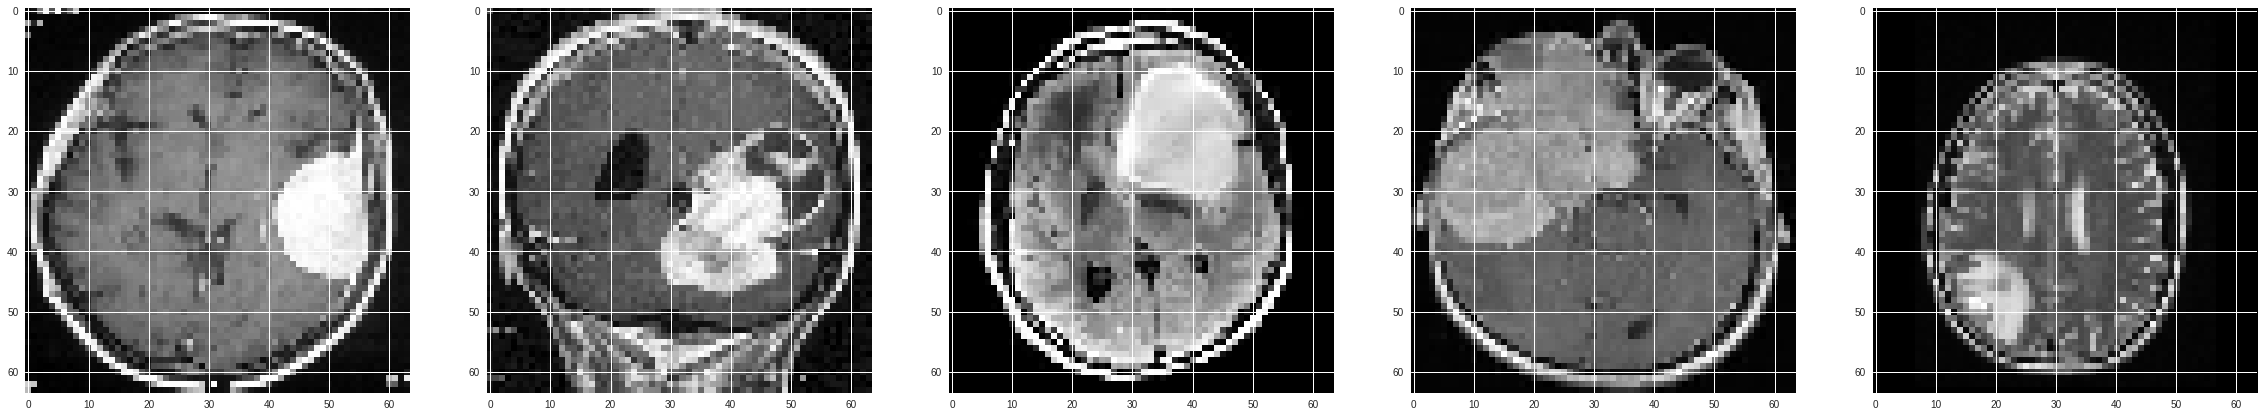

In [ ]:
plot_img(train_df)

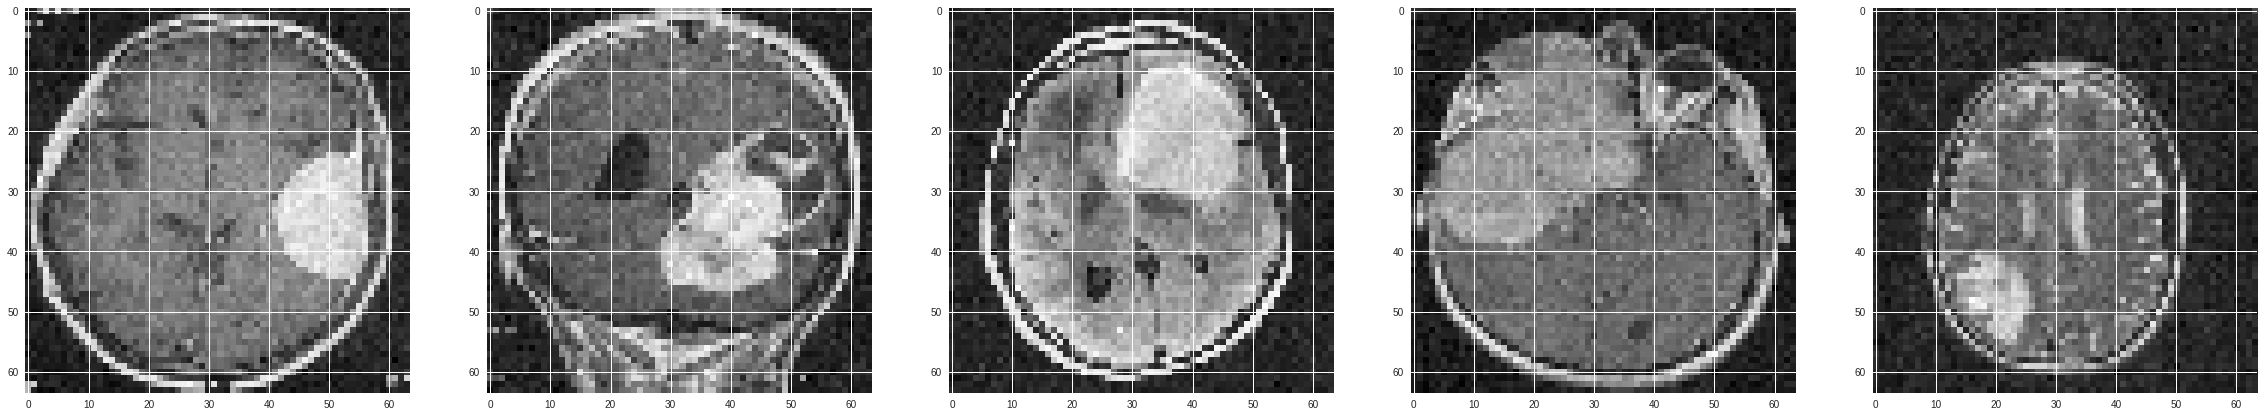

In [ ]:
plot_img(noised_df)

In [ ]:
xnoised=noised_df[:400]
xtest=noised_df[400:]

In [ ]:
def autoencoder():
  input_img=Input(shape=(64,64,1),name='image_input')
  #enoder 
  x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
  x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
  x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
  x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
   
  #decoder
  x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
  x = UpSampling2D((2,2), name='upsample1')(x)
  x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv4')(x)
  x = UpSampling2D((2,2), name='upsample2')(x)
  x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
   
  #model
  autoencoder = Model(inputs=input_img, outputs=x)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy',run_eagerly=True)
    
  return autoencoder

In [ ]:
model= autoencoder()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 1)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 64, 64)        640       
                                                                 
 pool1 (MaxPooling2D)        (None, 32, 32, 64)        0         
                                                                 
 Conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 pool2 (MaxPooling2D)        (None, 16, 16, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 16, 16, 64)        36928     
                                                                 
 upsample1 (UpSampling2D)    (None, 32, 32, 64)        0   

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(xnoised, xnoised, epochs=18, batch_size=10, validation_data=(xtest, xtest), callbacks=[early_stopping])

Epoch 1/18
16/16 [==============================] - 5s 336ms/step - loss: 0.6124
Epoch 2/18
16/16 [==============================] - 6s 332ms/step - loss: 0.5227
Epoch 3/18
16/16 [==============================] - 5s 294ms/step - loss: 0.4954
Epoch 4/18
16/16 [==============================] - 5s 293ms/step - loss: 0.4790
Epoch 5/18
16/16 [==============================] - 5s 292ms/step - loss: 0.4703
Epoch 6/18
16/16 [==============================] - 5s 293ms/step - loss: 0.4675
Epoch 7/18
16/16 [==============================] - 5s 293ms/step - loss: 0.4629
Epoch 8/18
16/16 [==============================] - 6s 361ms/step - loss: 0.4599
Epoch 9/18
16/16 [==============================] - 5s 293ms/step - loss: 0.4570
Epoch 10/18
16/16 [==============================] - 5s 293ms/step - loss: 0.4547
Epoch 11/18
16/16 [==============================] - 5s 291ms/step - loss: 0.4536
Epoch 12/18
16/16 [==============================] - 5s 294ms/step - loss: 0.4508
Epoch 13/18
16/16 [======

In [ ]:
xtrain= train_df[100:]

In [ ]:
pred= model.predict(xtest[:5])
def plot_predictions(y_true, y_pred):    
    f, ax = plt.subplots(4, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        ax[0][i].imshow(np.reshape(xtrain[i], (64,64)), aspect='auto', cmap='gray')
        ax[1][i].imshow(np.reshape(y_true[i], (64,64)), aspect='auto', cmap='gray')
        ax[2][i].imshow(np.reshape(y_pred[i], (64,64)), aspect='auto', cmap='gray')
        ax[3][i].imshow(cv2.medianBlur(xtrain[i], (5)), aspect='auto', cmap='gray')
    plt.tight_layout()
plot_predictions(xtest[:5], pred[:5])

ValueError: ignored

NameError: ignored

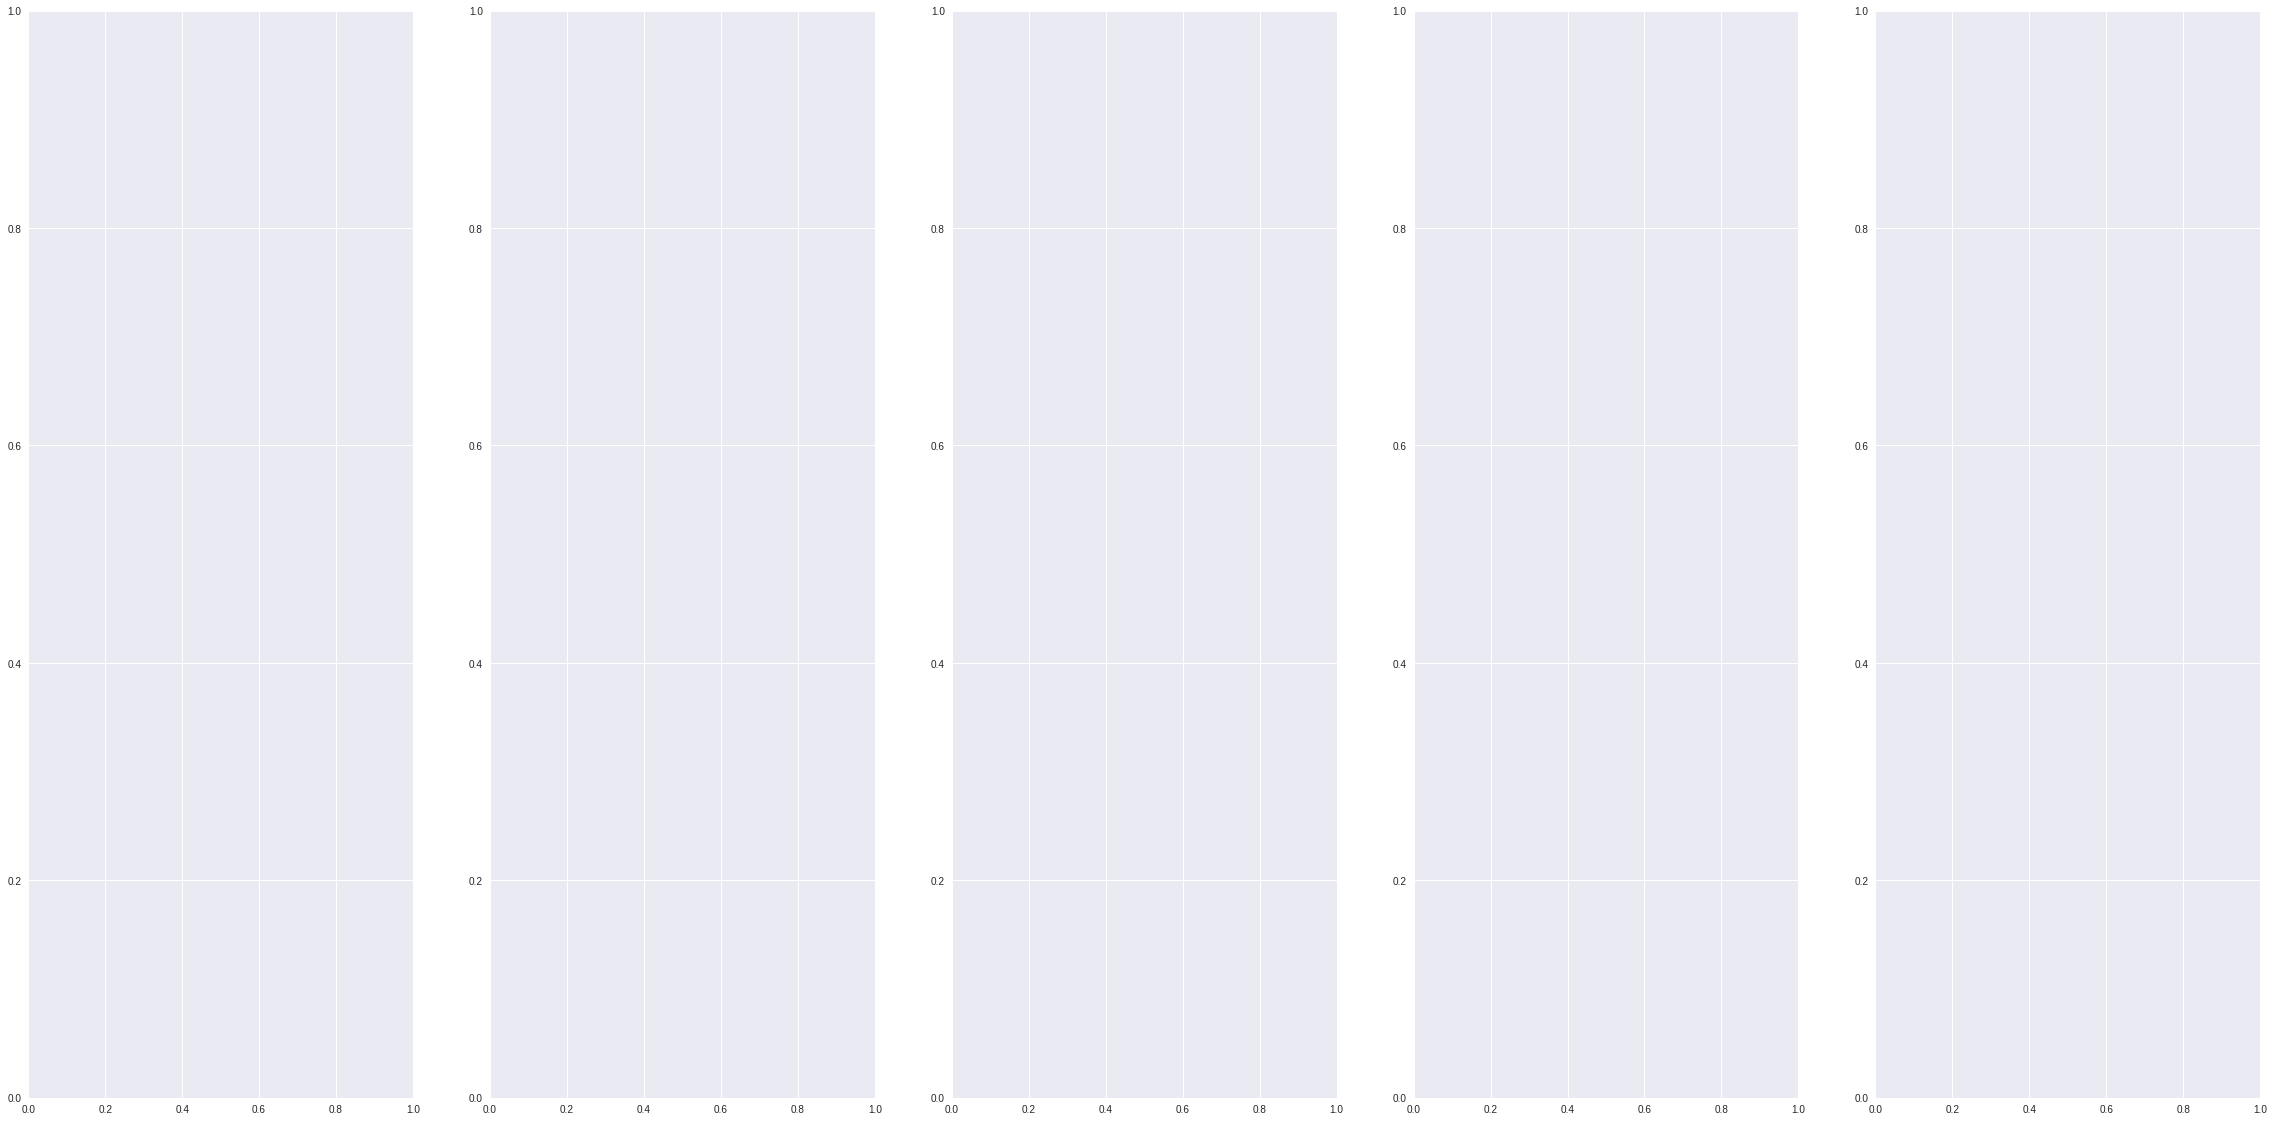

In [ ]:
median_blur = cv2.medianBlur(xtrain[0], (5))
gaussian_blur=cv2.GaussianBlur(xtrain[0],(5,5),0)
average_blur=cv2.blur(xtrain[0],(5,5))
bilateral_filter=cv2.bilateralFilter(xtrain[0],9,75,75)
f,ax=plt.subplots(1,5)
f.set_size_inches(40,20)
ax[0].imshow(pred[0].reshape(64,64), cmap='gray')
ax[0].set_title('Autoencoder Image')
ax[1].imshow(median_blur,cmap='gray')
ax[1].set_title('Median Filter')
ax[2].imshow(gaussian_blur,cmap='gray')
ax[2].set_title('Gaussian Filter')
ax[3].imshow(average_blur,cmap='gray')
ax[3].set_title('Average Filter')
ax[4].imshow(bilateral_filter,cmap='gray')
ax[4].set_title('Bilateral Filter')

In [ ]:
def PSNR(original, denoised): 
    mse = np.mean((original - denoised) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

  
value1 = PSNR(xtest[0], median_blur)
value2 = PSNR(xtest[0], pred[0])
value3 = PSNR(xtest[0], gaussian_blur)
value4 = PSNR(xtest[0], average_blur)
value5 = PSNR(xtest[0], bilateral_filter)

print("PSNR values")
print(f"Autoencoder Image : {value2} dB")
print(f"Median Filter Image : {value1} dB")
print(f"Gaussian Filter Image : {value3} dB")
print(f"Average Filter Image : {value4} dB")
print(f"Bilateral Filter Image : {value5} dB")

IndexError: ignored

# **IMAGE COMPRESSION**

In [ ]:
from PIL import Image

def compressed_size(counts, codes):
    header_size = 2 * 16 # height and width as 16 bit values

    tree_size = len(counts) * (1 + 8) # Leafs: 1 bit flag, 8 bit symbol each
    tree_size += len(counts) - 1 # Nodes: 1 bit flag each
    if tree_size % 8 > 0: # Padding to next full byte
        tree_size += 8 - (tree_size % 8)

    # Sum for each symbol of count * code length
    pixels_size = sum([count * len(codes[symbol]) for symbol, count in counts])
    if pixels_size % 8 > 0: # Padding to next full byte
        pixels_size += 8 - (pixels_size % 8)

    return (header_size + tree_size + pixels_size) / 8

def encode_header(image, bitstream):
    height_bits = pad_bits(to_binary_list(image.height), 16)
    bitstream.write_bits(height_bits)    
    width_bits = pad_bits(to_binary_list(image.width), 16)
    bitstream.write_bits(width_bits)

def encode_tree(tree, bitstream):
    if type(tree) == tuple: # Note - write 0 and encode children
        bitstream.write_bit(0)
        encode_tree(tree[0], bitstream)
        encode_tree(tree[1], bitstream)
    else: # Leaf - write 1, followed by 8 bit symbol
        bitstream.write_bit(1)
        symbol_bits = pad_bits(to_binary_list(tree), 8)
        bitstream.write_bits(symbol_bits)

def encode_pixels(image, codes, bitstream):
    for pixel in image.getdata():
        for value in pixel:
            bitstream.write_bits(codes[value])

def compress_image(in_file_name, out_file_name):
    print('Compressing "%s" -> "%s"' % (in_file_name, out_file_name))
    image = Image.open(in_file_name)
    print('Image shape: (height=%d, width=%d)' % (image.height, image.width))
    size_raw = raw_size(image.height, image.width)
    print('RAW image size: %d bytes' % size_raw)
    counts = count_symbols(image)
    print('Counts: %s' % counts)
    tree = build_tree(counts)
    print('Tree: %s' % str(tree))
    trimmed_tree = trim_tree(tree)
    print('Trimmed tree: %s' % str(trimmed_tree))
    codes = assign_codes(trimmed_tree)
    print('Codes: %s' % codes)

    size_estimate = compressed_size(counts, codes)
    print('Estimated size: %d bytes' % size_estimate)

    print('Writing...')
    stream = OutputBitStream(out_file_name)
    print('* Header offset: %d' % stream.bytes_written)
    encode_header(image, stream)
    stream.flush() # Ensure next chunk is byte-aligned
    print('* Tree offset: %d' % stream.bytes_written)
    encode_tree(trimmed_tree, stream)
    stream.flush() # Ensure next chunk is byte-aligned
    print('* Pixel offset: %d' % stream.bytes_written)
    encode_pixels(image, codes, stream)
    stream.close()

    size_real = stream.bytes_written
    print('Wrote %d bytes.' % size_real)

    print('Estimate is %scorrect.' % ('' if size_estimate == size_real else 'in'))
    print('Compression ratio: %0.2f' % (float(size_raw) / size_real))

In [ ]:
compress_image("encoded_image.png", "compressed_encoded_image.png")

Compressing "encoded_image.png" -> "compressed_encoded_image.png"
Image shape: (height=255, width=197)


NameError: ignored

## **TARGET END**

In [ ]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from PIL import Image
import stepic

# **SIGNATURE AND MESSAGE DECODING**

In [ ]:
im = Image.open('encoded_image.png')
stegoImage = stepic.decode(im)

ind_sep = stegoImage.find('SIGNATURE')
message = bytes(stegoImage[:ind_sep],'utf-8')
signature = bytes(stegoImage[ind_sep+9:], 'latin1')

# **VERIFY DIGITAL SIGNATURE**

In [ ]:
def load_pukey(filename):
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()
    public_key = load_pem_public_key(pemlines, default_backend())
    return public_key

public_key = load_pukey("public_key")
try:
    public_key.verify(signature, message, padding.PSS(mgf=padding.MGF1(hashes.SHA256()), 
                                                  salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256())
    print(message)
except InvalidSignature:
    print('Invalid!')

b'+c4GohkSulAqTpE+/TmA2/33ftwonZp5tFV/4AYMsegqiNDjIPsVEG1HOWIiBJ6hEEk9rtzj2dit++wenqzXRA=='


# **AES DECODING**

In [ ]:
BS = 16
pad = lambda s: bytes(s + (BS - len(s) % BS) * chr(BS - len(s) % BS), 'utf-8')
unpad = lambda s : s[0:-ord(s[-1:])]

class AESCipher:

    def __init__( self, key ):
        self.key = bytes(key, 'utf-8')

    def decrypt( self, enc ):
        enc = base64.b64decode(enc)
        iv = enc[:16]
        cipher = AES.new(self.key, AES.MODE_CBC, iv )
        return unpad(cipher.decrypt( enc[16:] )).decode('utf8')

cipher = AESCipher('LKHlhb899Y09olUi')
AES_decrypted = cipher.decrypt(message)

print(AES_decrypted)

TCTCGATCCGGCGCTACCACGCGCGGCAAGATGTCTCGACGC


# **DNA DECODING**

In [ ]:
DNA_data = { "words":["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W",
                   "X","Y","Z"," ",",",".",":",0,1,2,3,4,5,6,7,8,9],
            "DNA_code": ["CGA","CCA","GTT","TTG","GGC","GGT","TTT","CGC","ATG","AGT","AAG","TGC","TCC","TCT","GGA","GTG",
                         "AAC","TCA","ACG","TTC","CTG","CCT","CCG","CTA","AAA","CTT","ACC","TCG","GAT","GCT","ACT","TAG",
                         "ATA","GCA","GAG","AGA","TTA","ACA","AGG","GCG"]
           }

DNA_df = pd.DataFrame.from_dict(DNA_data)

l = [AES_decrypted[i:i+3] for i in range(0, len(AES_decrypted), 3)]

original_message = ""
for i in l:
    original_message+= str(DNA_df.loc[ DNA_df['DNA_code'] == i , 'words' ].iloc[0])
print("The sectet message is: ",original_message.lower())

The sectet message is:  name: shekinah
